In [56]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('google_stock_1000.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2021-01-01 00:00:00,142.161929,151.992817,138.916718,141.923872,1577461
1,2021-01-02 00:00:00,147.229931,156.236511,142.553513,155.148449,2918538
2,2021-01-03 00:00:00,186.492832,188.399192,179.428063,185.343226,2740927
3,2021-01-04 00:00:00,173.681450,176.464416,164.659885,169.012356,4210826
4,2021-01-05 00:00:00,193.428154,197.869685,187.083219,187.269913,3550946


In [60]:
df.shape

(1000, 6)

In [62]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [64]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [67]:
x = df[['Open', 'High' , 'Low' , 'Volume']].values
y = df['Close'].values

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

regressor = LinearRegression()

model = regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test) 

print(y_pred)

[117.32156008 161.14849022 100.51411885 105.99838981 148.2532589
 162.92135162 126.03905519 196.19641821 181.34533748 105.5363165
 171.50263175 159.87200135 190.14213117 101.40348508 120.73936255
 128.07298107 166.82666658 144.89972497 107.22850569 170.9420927
 193.17798981 126.51921811 111.56516521 191.91196594 195.86144236
 155.44171704 195.58616978 153.79962686 147.30629026 149.8817362
 148.57304598 130.51576843 168.33066402 181.14980309 192.95255287
 174.10872889 168.72186507 169.45662519 145.56738626 122.27645876
 153.12926612 116.03286789 182.07893982 190.30217099 119.45036755
 178.14899452 123.89715522 116.71925506 118.64816758 177.55122026
 163.66376873 108.49488176 194.81321898 117.65762093 122.79837057
 171.93533974 110.66429873 123.0368069  158.90909227 132.2439573
 185.58597559 189.3915578  103.87552536 196.47483129 118.16955595
 138.41635512 188.54224797  98.67124354 166.992864   114.44791604
 188.16073339 173.47232427 151.28556068 155.99450949 124.48748602
 179.24630055 1

In [73]:
predicted = regressor.predict(x_test)

dframe = pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dframe)

     Actual_Price  Predicted_Price
0      117.220590       117.321560
1      163.661886       161.148490
2       97.196056       100.514119
3      105.484755       105.998390
4      148.140020       148.253259
..            ...              ...
195    111.410358       116.565954
196    155.884072       153.208205
197    125.852490       120.208773
198    121.165925       119.998422
199    194.248724       197.458627

[200 rows x 2 columns]


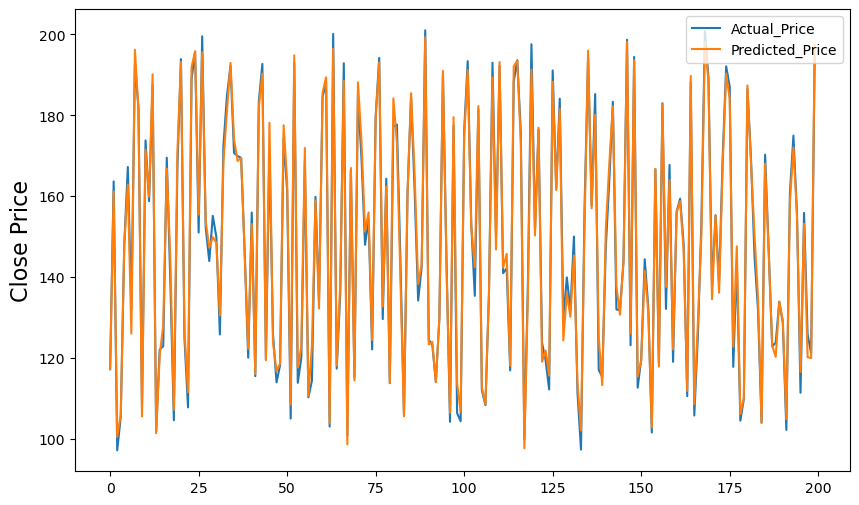

In [75]:
plt.figure(figsize=(10, 6))
plt.ylabel('Close Price', fontsize=16)
plt.plot(dframe)
plt.legend(['Actual_Price', 'Predicted_Price'])
plt.show()

<Axes: >

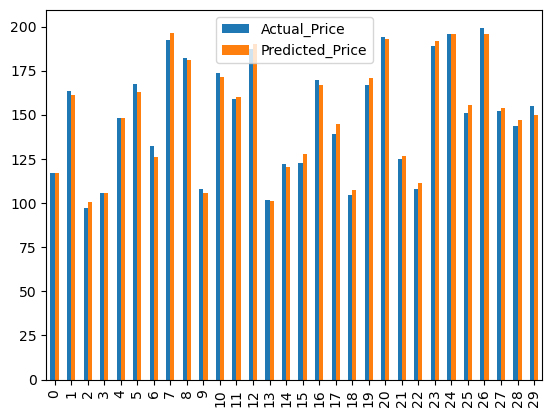

In [77]:
graph = dframe.head(30)
graph.plot(kind='bar')